In [459]:
import numpy as np

# Optimazing a function

In [460]:
P_min = -3
P_max = 3
#num_of_bits = np.floor(np.log2(P_max-P_min)) + 1
num_of_bits = 8
crm_len = 2*int(num_of_bits)
num_of_crm = 20
p_cross = 1.0
p_mutation = 0.04
epsilon = 0.0001
max_gen = 1000

## Functions

In [461]:
def decode(chromosome):
    str_crm = str(chromosome)
    str_crm = str_crm.replace(' ','').replace('[','').replace(']','').replace(',','')
    str_x = str_crm[0:int(crm_len/2)]
    str_y = str_crm[int(crm_len/2):]
    x = int(str_x,2)
    y = int(str_y,2)
    #print(x,y)
    x = (P_max-P_min)/(2**num_of_bits - 1) * x + P_min
    y = (P_max-P_min)/(2**num_of_bits - 1) * y + P_min
    #print(x,y)
    return x,y

In [462]:
def f_coded(chromosome):
    x,y = decode(chromosome)
    #print(x,y)
    f = 3*(1-x)**2*np.exp(-x**2-(y+1)**2)-10*(x/5-x**3-y**5)*np.exp(-x**2-y**2)-(1/3)*np.exp(-(x+1)**2-y**2)
    return f+8
def f_normal(vars):
    x,y = vars
    f = 3*(1-x)**2*np.exp(-x**2-(y+1)**2)-10*(x/5-x**3-y**5)*np.exp(-x**2-y**2)-(1/3)*np.exp(-(x+1)**2-y**2)
    return f+8

In [463]:
def init_population():
        ind = np.random.randint(0, high=2, size=(num_of_crm,crm_len), dtype='l')
        return list(ind) 
i = init_population()
i

[array([0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0]),
 array([1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1]),
 array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0]),
 array([1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0]),
 array([1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1]),
 array([1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0]),
 array([0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1]),
 array([1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0]),
 array([0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0]),
 array([1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0]),
 array([1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0]),
 array([0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0]),
 array([1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0]),
 array([1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0]),
 array([0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1]),
 array([1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1]),
 array([1, 1, 

In [464]:
def fitness_of_population(ind):
    fitness_ = []
    for i in np.arange(0,len(ind)):
        fitness_.append(f_coded(ind[i]))
    #print(fitness_of_population)
    return fitness_

In [465]:
def roulette(ind):
    selected = []
    fitness_of_pop = fitness_of_population(ind)
    probs = fitness_of_pop/sum(fitness_of_pop)
    #print(probs)
    selected_idx = list(np.random.choice(np.arange(0,len(ind)),size=2,replace=True,p=probs))
    #print(probs[selected_idx[0]],probs[selected_idx[1]])
    selected.append(ind[selected_idx[0]])
    selected.append(ind[selected_idx[1]])
    return selected

In [466]:
def cross(ind):
    next_gen = []
    while len(next_gen) < num_of_crm :
        male, female = roulette(ind)
        female = list(female)
        male = list(male)
        c = np.random.randint(1,crm_len-1)
        daughter = female[0:c] + male[c:]
        son      = male[0:c] + female[c:]
        next_gen.append(np.array(daughter))
        next_gen.append(np.array(son))
    return next_gen

In [467]:
def mutate(ind):
    does_it_mutate = np.random.rand(len(ind),crm_len)
    does_it_mutate = (does_it_mutate < p_mutation)
    subjects = np.mod(does_it_mutate + ind, 2)
    return subjects

In [468]:
def perform_selection():
    mins, maxs, means, best = [], [], [], []
    individuals = init_population()
    fitness_of_pop = fitness_of_population(individuals)
    best.append(individuals[np.argmax(fitness_of_pop)])

    max = np.max(fitness_of_pop)
    mean = np.mean(fitness_of_pop)
    min = np.min(fitness_of_pop)

    maxs.append(max)
    means.append(mean)
    mins.append(min)

    for i in range(max_gen):
        next_gen = mutate(cross(individuals))
        individuals = next_gen
        fitness_of_pop = fitness_of_population(individuals)
        best.append(individuals[np.argmax(fitness_of_pop)])

        max = np.max(fitness_of_pop)
        mean = np.mean(fitness_of_pop)
        min = np.min(fitness_of_pop)

        maxs.append(max)
        means.append(mean)
        mins.append(min)
    return mins, maxs, means, best


In [469]:
mins, maxs, means, best = perform_selection()
res = decode(best[-1])
res

(0.3647058823529412, 1.7529411764705882)

(0.3647058823529412, 1.7529411764705882) 14.69588463666215


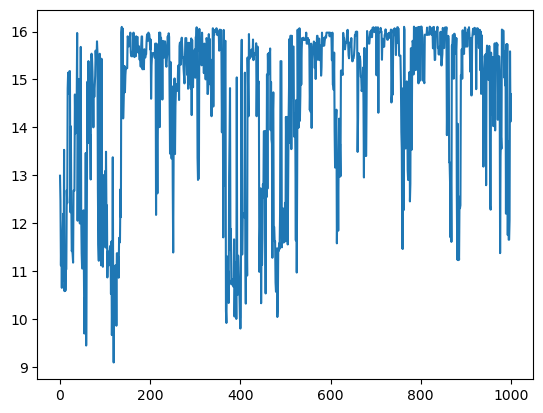

In [470]:
import matplotlib. pyplot as plt
plt.plot(maxs)
print(decode(best[-1]),f_coded(best[-1]))